**dataset**: https://www.kaggle.com/datasets/nguyenngocphung/10000-amazon-products-dataset

**Objetivo**: Atraves do Dataset analisar e informar os produtos mais populares dentre os 10.000, e a média de preços dos que mais se destacam.

**Objectve**: Through the Dataset, analyze and inform the most popular products among the 10,000, and the average price of those that stand out the most.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amazon_products = pd.read_csv('Amazon_Products.csv', dtype='unicode')

#### Analisando as colunas e linhas do DataFrame

#### Analysing the dataframe´s columns and lines

In [3]:
amazon_products.head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cb34f0a84102c1ebc3ef6892d7444d36,20pcs Model Garden Light Double Heads Lamppost...,Generic,£6.99,NaN,2,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Lighti...,These delicate model garden lights are mainly ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,£24.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby BR bogie passenger ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,7,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Inject a bit of Hornby mag...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7e2aa2b4596a39ba852449718413d7cc,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Western Express Digital Train Set with eLink a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5afbaf65680c9f378af5b3a3ae22427e,Learning Curve Chuggington Interactive Chatsworth,Chuggington,NaN,1 new,8,1,4.8 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description An amazingly Interactive C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Selecionando as colunas que irei utilizar, e convertendo os tipos dos dados 
#### Selecting the columns that I will use, and converting the columns data types

In [4]:
# São 881 colunas vazias
# there are 881 empty konas
amazon_products.info(895)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 895 columns):
 #    Column                                       Dtype 
---   ------                                       ----- 
 0    uniq_id                                      object
 1    product_name                                 object
 2    manufacturer                                 object
 3    price                                        object
 4    number_available_in_stock                    object
 5    number_of_reviews                            object
 6    number_of_answered_questions                 object
 7    average_review_rating                        object
 8    amazon_category_and_sub_category             object
 9    description                                  object
 10   product_information                          object
 11   product_description                          object
 12   items_customers_buy_after_viewing_this_item  object
 13   customer_quest

In [5]:
amazon_products = pd.read_csv('Amazon_Products.csv', dtype='unicode', usecols=['product_name', 'manufacturer', 'price', 'number_available_in_stock',
                                                                               'number_of_reviews', 'number_of_answered_questions', 'average_review_rating',
                                                                               'amazon_category_and_sub_category'])

In [6]:
df = amazon_products.copy()

In [7]:
display(df)

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
...,...,...,...,...,...,...,...,...
9999,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...
10000,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys
10001,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...
10002,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   product_name                      10002 non-null  object
 1   manufacturer                      9995 non-null   object
 2   price                             8567 non-null   object
 3   number_available_in_stock         7502 non-null   object
 4   number_of_reviews                 9984 non-null   object
 5   number_of_answered_questions      9237 non-null   object
 6   average_review_rating             9984 non-null   object
 7   amazon_category_and_sub_category  9312 non-null   object
dtypes: object(8)
memory usage: 625.4+ KB


In [9]:
df[df['number_available_in_stock'].str.contains("used", na=False)].head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
17,Chuggington Interactive Wash and Fuel Set with...,Chuggington,NaN,1 used,2,1,4.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
161,Hornby R322 OO Scale Class 8F 2-8-0 Steam Loco...,Hornby,NaN,1 used,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
198,Tomy Thomas Track Master Bulgy Train,Tomy,NaN,1 used,2,1,5.0 out of 5 stars,Characters & Brands > Thomas & Friends > Train...
225,MBNF Join In and Play My Blue Nose Friend Bink...,MBNF,NaN,1 used,42,1,4.8 out of 5 stars,NaN
232,"9"" I Love You Heart Me to You Bear",Me To You,NaN,1 used,1,1,5.0 out of 5 stars,NaN


In [10]:
# Criando uma nova coluna para separar os usados dos novos
# Creating a new column to separate the uset from new
item = ("new","used")
df["item_type"] = df["number_available_in_stock"].str.extract(f'({"|".join(item)})')

In [11]:
df["item_type"].unique()

array(['new', nan, 'used'], dtype=object)

In [12]:
# Removendo o simbolo da moeda £ euro da coluna price
# Removing the currecy simbol £ from the price column
df["new_price"] = df["price"].str.split(" ", expand = True).get(0).str.split("£", expand = True).get(1)

In [13]:
# Vendo se há valores no range de mais de mil
# Looking if has item that cost more than a hundred euro
df[df.new_price.str.contains(',', na=False)]

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,item_type,new_price
7098,Bowen Designs - Marvel Statue Thor Classic Act...,Bowen Designs,"£2,439.92",2 new,1,1,4.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Access...,new,"2,439.92"


In [14]:
# mantendo apenas os numeros do stock, e mudando o tipo da coluna
# keeping only the stockr number, and tchange the columns type
df["number_available_in_stock"] = df["number_available_in_stock"].str.extract("(\d+)").astype(np.float)

C:\Users\LuisFS\AppData\Local\Temp\ipykernel_16620\1955509631.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["number_available_in_stock"] = df["number_available_in_stock"].str.extract("(\d+)").astype(np.float)


In [15]:
# Mantendo apenas as avaliações na coluna
# Keeping only the column rating
df["new_average_review_rating"] = df["average_review_rating"].str.split(" out of ", expand=True).get(0)

In [16]:
df["main_category"] = df["amazon_category_and_sub_category"].str.split(" > ", expand=True).get(0)

In [17]:
# Checando por valores não numericos
# Checking for non-numeric values
pd.to_numeric(df["number_of_reviews"], errors = 'coerce')
pd.to_numeric(df["number_of_reviews"], errors = 'coerce').isnull()
df[pd.to_numeric(df["number_of_reviews"], errors = 'coerce').isnull()]

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,item_type,new_price,new_average_review_rating,main_category
71,Power Trains Auto Loader City,POWER CITY TRAINS,£76.99,2.0,NaN,1,NaN,NaN,new,76.99,NaN,NaN
224,Latitude 320622 Simon the Lion,L'Atitude,£22.89,4.0,NaN,1,NaN,NaN,new,22.89,NaN,NaN
435,Story Cubes Spurensuche [German Version],Hutter Trade GmbH + Co KG,£8.78,10.0,NaN,1,NaN,Games > Board Games,new,8.78,NaN,Games
554,Story Cubes Voyages [German Version],Hutter Trade GmbH + Co KG,£12.41,12.0,NaN,1,NaN,Games > Dice & Dice Games,new,12.41,NaN,Games
610,Frozen Signature Collection Anna and Elsa Dolls,Disney Frozen,£24.97,11.0,NaN,6,NaN,Characters & Brands > Disney > Toys,new,24.97,NaN,Characters & Brands
1012,Teenage Mutant Ninja Turtles Mutations Mutatin...,Teenage Mutant Ninja Turtles,NaN,NaN,NaN,NaN,NaN,Figures & Playsets > Science Fiction & Fantasy,NaN,NaN,NaN,Figures & Playsets
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,"{""""text"""":""""Digital & Prime Music""""","panelKey"""":""""Mp3Panel""""}","{""""subtext"""":""""A great selection of apps and g...",NaN,"subtextKey"""":""""android-tagline""""","panelKey"""":""""AndroidPanel""""}","{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}",NaN,None,"{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}"
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,"{""""text"""":""""Digital & Prime Music""""","panelKey"""":""""Mp3Panel""""}","{""""subtext"""":""""A great selection of apps and g...",NaN,"subtextKey"""":""""android-tagline""""","panelKey"""":""""AndroidPanel""""}","{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}",NaN,None,"{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}"


In [18]:
# Aqui vemos que as linhas 2003 e 2005 tem que serem deletadas
# The lines 2003, and 2005 has to be deleted
df.drop([2003, 2005], inplace = True)

In [19]:
# Removendo as virgulas
# Removing the comma signal
df["new_price"] = df["new_price"].str.replace(",","")
df["number_of_reviews"] = df["number_of_reviews"].str.replace(",", "")

In [20]:
# Dropando as colunas que não irei usar
# Dropping the columns that i will not use
df.drop(["price", "average_review_rating", "amazon_category_and_sub_category"], axis=1, inplace=True)

In [21]:
# Mudando os tipo das colunas
# Changing the column types
df["new_average_review_rating"] = df["new_average_review_rating"].astype(float)
df["new_price"] = df["new_price"].astype(float)
df["number_available_in_stock"] = df["number_available_in_stock"].astype(float)
df["number_of_answered_questions"] = df["number_of_answered_questions"].astype(float)
df["number_of_reviews"] = df["number_of_reviews"].astype(float)
df["product_name"] = df["product_name"].astype('category')
df["main_category"] = df["main_category"].astype('category')
df["manufacturer"] = df["manufacturer"].astype('category')
df["item_type"] = df["item_type"].astype('category')

In [22]:
df.dtypes

product_name                    category
manufacturer                    category
number_available_in_stock        float64
number_of_reviews                float64
number_of_answered_questions     float64
item_type                       category
new_price                        float64
new_average_review_rating        float64
main_category                   category
dtype: object

In [23]:
df.head()

,product_name,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,item_type,new_price,new_average_review_rating,main_category
0,Hornby 2014 Catalogue,Hornby,5.0,15.0,1.0,new,3.42,4.9,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,NaN,2.0,1.0,NaN,16.99,4.5,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,2.0,17.0,2.0,new,9.99,3.9,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,NaN,1.0,2.0,NaN,39.99,5.0,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,NaN,3.0,2.0,NaN,32.19,4.7,Hobbies


- Depois de manipulação das colunas para fazer a análise essas sao as colunas no dataframe final
- After manipulation of the columns to do the analysis are columns in the final dataframe

### Colunas do Dataset / Dataset Columns

**product_name**: Nome do Produto.

------------------------------------------------------------------------------------------------------------------------
**manufacturer**: O fabricante do Produto(LEGO, Disney, Oxford Diecast, Playmobil, Star Wars, Mattel, Hasbro, The Puppet Company, MyTinyWorld, Corgi, Hornby, Scalextric, Pokémon, Schleich, Amscan, Every-occasion-party-supplies, FunKo, Melissa & Doug, Papo, Tamiya).

**Manufacturer**:LEGO, Disney, Oxford Diecast, Playmobil, Star Wars, Mattel, Hasbro, The Puppet Company, MyTinyWorld, Corgi, Hornby, Scalextric, Pokémon, Schleich, Amscan, Every-occasion-party-supplies, FunKo, Melissa & Doug, Papo, Tamiya

------------------------------------------------------------------------------------------------------------------------
**number_available_in_stock**: Número de produtos disponiveis no stock.

**Number_available_in_stock**: Number of products available to purchase in stock

------------------------------------------------------------------------------------------------------------------------
**number_of_reviews**:  A média do número de avaliações dos clientes para o Produto.

**number_of_reviews**: The average number of reviews for the costumers

------------------------------------------------------------------------------------------------------------------------
**number_of_answered_questions**: Número de respostas do vendedor ao cliente.

------------------------------------------------------------------------------------------------------------------------
**item_type**: Tipo do Item (novo ou usado).

**item_type**: new or used

------------------------------------------------------------------------------------------------------------------------
**new_price**: O preço do Produto.

**new_price**: Product price

------------------------------------------------------------------------------------------------------------------------
 **new_average_review_rating**: A média da avaliação do Produto (de 0 a 5.0).
 
 **new_average_review_rating**the average product reviews (From 0 to 5.0).
 
------------------------------------------------------------------------------------------------------------------------
 **main_category**: The products main category.

 **main_category**: A Categoria principal dos produtos (Hobbies, Die-Cast & Toy Vehicles, Figures & Playsets,Characters & Brands, Games, Arts & Crafts, Party Supplies, Fancy Dress, Sports Toys & Outdoor, Dolls & Accessories, Jigsaws & Puzzles, Puppets & Puppet Theatres, Baby & Toddler Toys, Pretend Play, Musical Toy Instruments, Novelty & Special Use, Pens, Pencils & Writing Supplies, Office Supplies, Electronic Toys, Home Accessories, Cooking & Dining, Bags, Women, Worlds Apart, Educational Toys, Gardening, Medication & Remedies, Sweets, Chocolate & Gum, Indoor Lighting, Supporters' Gear, Dogs, Sex & Sensuality, Bedding & Linens, Storage, Cleaning & Ring Sizers, Camping & Hiking, Laundry, Storage & Organisation, Car Parts, Medical Supplies & Equipment, Handbags & Shoulder Bags, Novelty Jewellery, Lab & Scientific Products, Men, Jams, Honey & Spreads).

In [24]:
# Verificando dados nulos
# Checking null data
df.isnull().sum()

product_name                       2
manufacturer                       9
number_available_in_stock       2502
number_of_reviews                 20
number_of_answered_questions     767
item_type                       2517
new_price                       1437
new_average_review_rating         20
main_category                    692
dtype: int64

In [25]:
df['product_name']=df['product_name'].fillna(df['product_name'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['number_available_in_stock']=df['number_available_in_stock'].fillna(df['number_available_in_stock'].mode()[0])
df['number_of_reviews']=df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0])
df['number_of_answered_questions']=df['number_of_answered_questions'].fillna(df['number_of_answered_questions'].mode()[0])
df['item_type']=df['item_type'].fillna(df['item_type'].mode()[0])
df['new_price']=df['new_price'].fillna(df['new_price'].mode()[0])
df['new_average_review_rating']=df['new_average_review_rating'].fillna(df['new_average_review_rating'].mode()[0])
df['main_category']=df['main_category'].fillna(df['main_category'].mode()[0])

<AxesSubplot:>

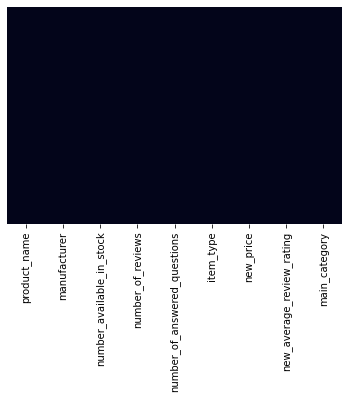

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [27]:
df.describe()

,number_available_in_stock,number_of_reviews,number_of_answered_questions,new_price,new_average_review_rating
count,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,6.436813,9.123675,1.770946,18.800004,4.707868
std,8.044277,33.696366,2.428998,43.038473,0.372136
min,1.000000,1.000000,1.000000,0.010000,2.300000
25%,2.000000,1.000000,1.000000,5.950000,4.500000
50%,3.000000,2.000000,1.000000,9.990000,5.000000
75%,7.000000,6.000000,2.000000,17.990000,5.000000
max,92.000000,1399.000000,39.000000,2439.920000,5.000000


- Há uma correlação entre number_of_reviews e o number_available_in_stock, e  tambem entre o number_of_answred questions e o number_of_reviews

- There are a correlation between number_of_review and the number_available_in_syock, and between number_of_answered_questions and the number_of_reviews

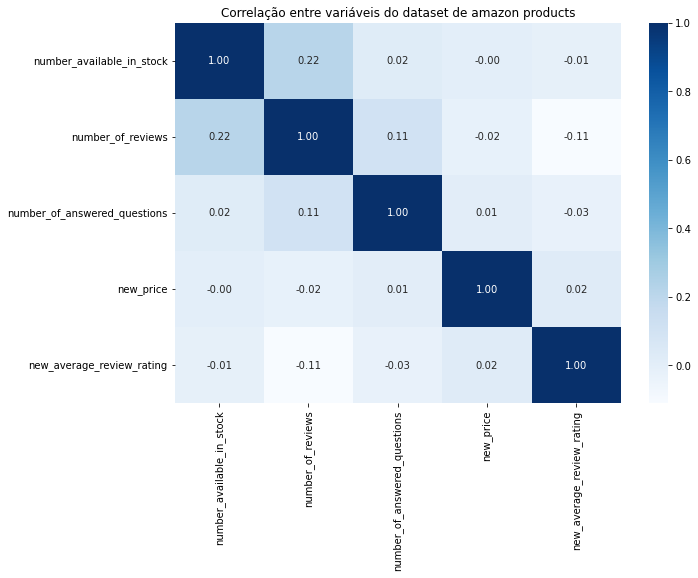

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de amazon products')
plt.show()

- vou plotar os graficos analisando, depois eu pego as 20 mais famosas da variavel 
- Para ver o gráfico detalhadamente preciso diminuir apenas até o escencial

---------------------------------------------------------------------------------------------------------------------------

- I will plot the analysis graph first, then I  take the 20 most famous variable
- To see the graph in detail I need to reduce just to the essential

C:\Users\LuisFS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews'>

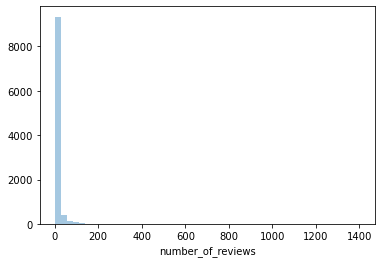

In [29]:
# Como podemos ver que ate 10, 20 reviews são valores bons de reviews
# 10 to 20 is a good number_of_reviews values
sns.distplot(df.number_of_reviews, kde=False)

<IPython.core.display.Javascript object>


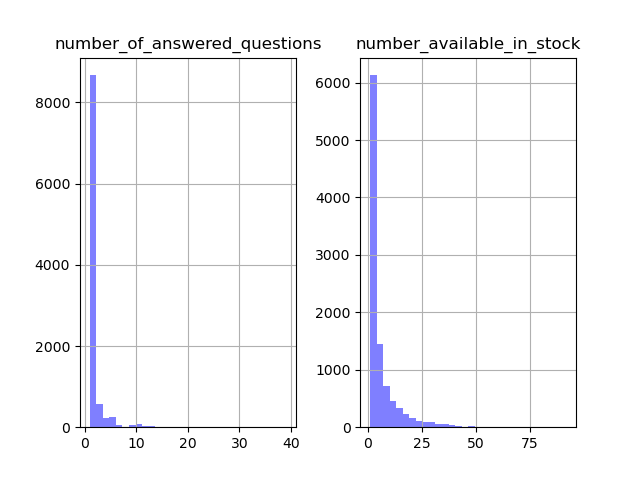

array([[<AxesSubplot:title={'center':'number_of_answered_questions'}>,
        <AxesSubplot:title={'center':'number_available_in_stock'}>]],
      dtype=object)

In [30]:
# Assim como o numero_of_reviews, as duas variaveis abaixo de stock e de perguntas respondidas, quanto menor a quantidade maior a o interesse do publico
# Like the number_of_reviews variable, the next two variable, work better when it has just few products
%matplotlib notebook
df[['number_of_answered_questions','number_available_in_stock']].hist(bins=30,alpha=0.5,color='blue')

<IPython.core.display.Javascript object>


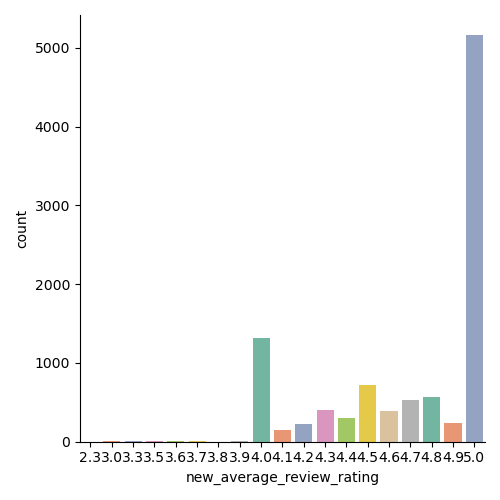

In [31]:
# A maioria das avaliações são de 5.0
# The most rating are 5.0
sns.catplot(x="new_average_review_rating", kind="count", palette="Set2", data=df);

- Criei uma variavel para cada coluna para que ficar organizado. Para que eu possa analisar melhor trabalhando comm a quantidade nescessária de algumas colunas

- I created a variable for each column, to be organized. That I can analyze better working with the necessary amount of some columns

In [32]:
#criei uma variavel para cada coluna para que nao fique tao desorganizado, e que possa analisar melhor comm a melhor quantidade
#trabalhando apenas com o nescessário de algumas colunas
reviews = df[df['number_of_reviews']<= 12.0]
answered_questions = df[df['number_of_answered_questions']<= 10.0]
stock = df[df['number_available_in_stock']<= 20.0]
review_rating = df[df['new_average_review_rating']>= 4.0]

<IPython.core.display.Javascript object>


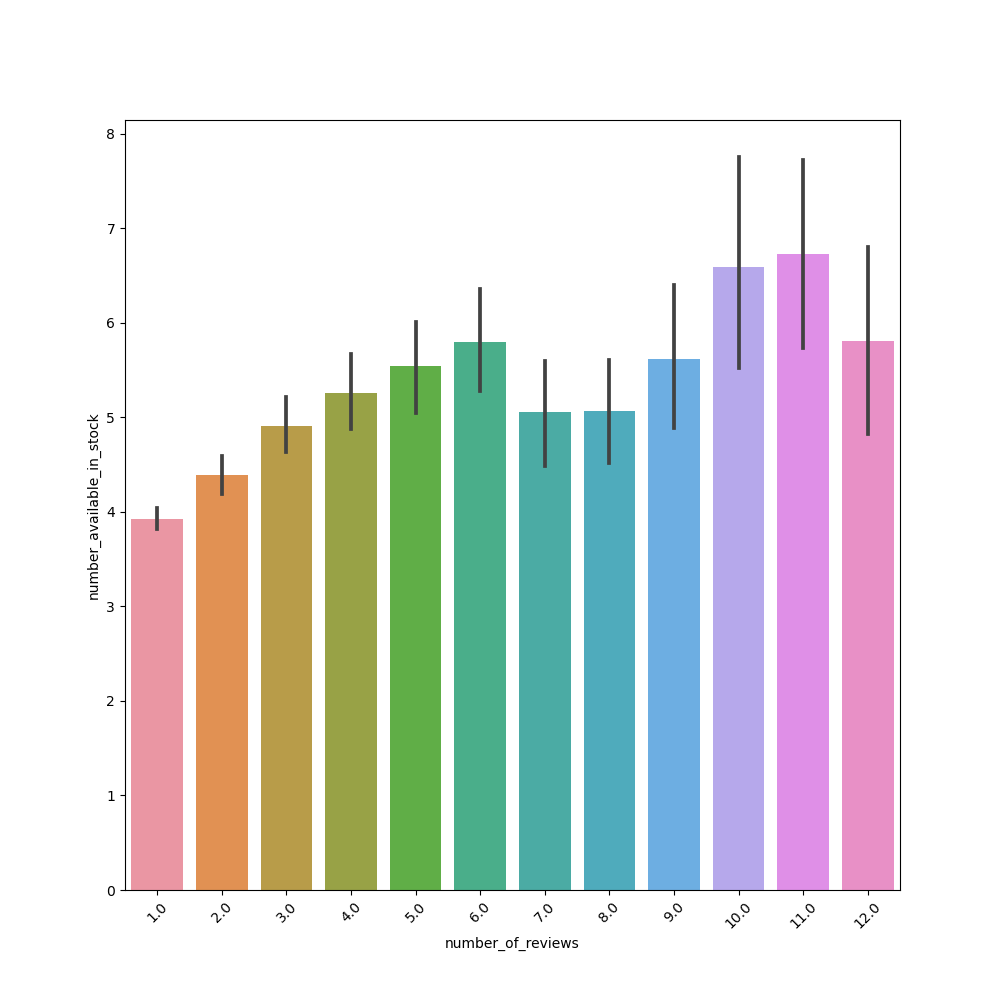

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0')])

In [33]:
# O number_available_in_stock permanece entre 4 e 7
# The number_available_in_stock remains between 4 and 7 
plt.figure(figsize=(10, 10))
sns.barplot(x=reviews['number_of_reviews'], y=stock['number_available_in_stock']);
plt.xticks(rotation=45)

<IPython.core.display.Javascript object>


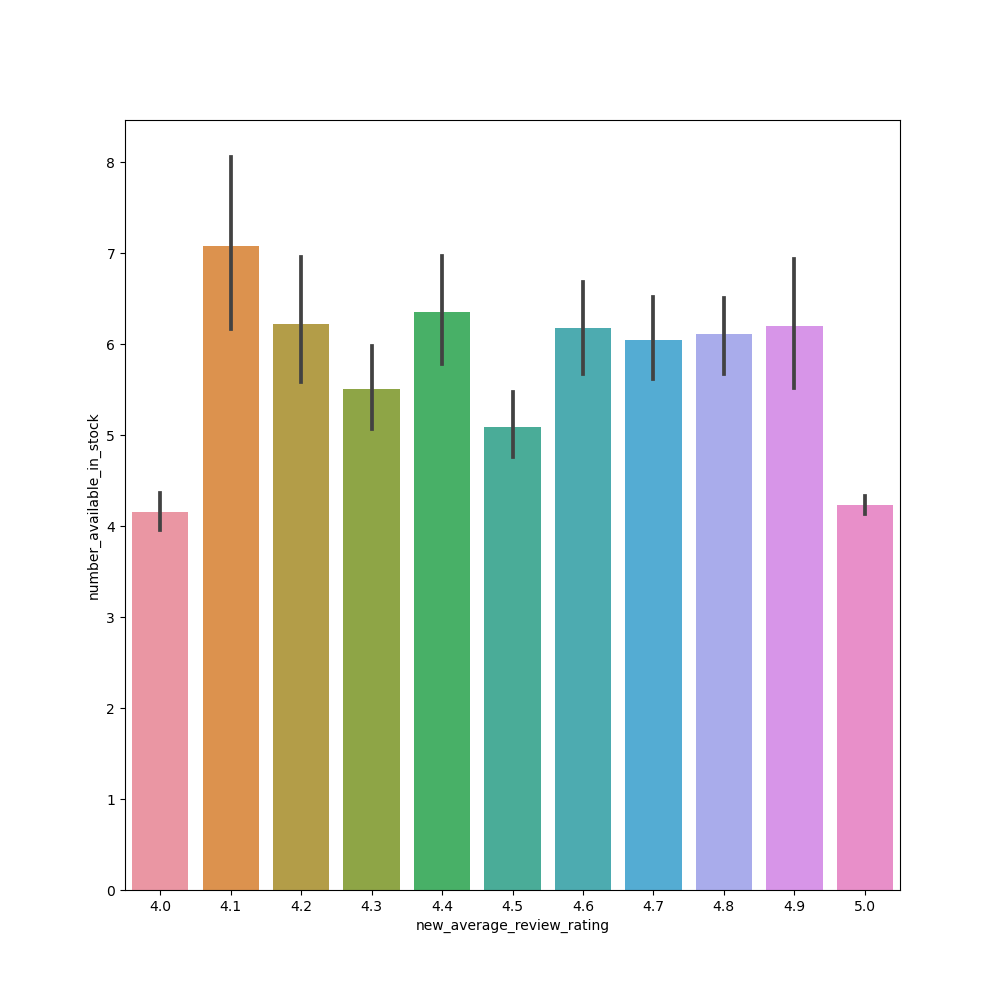

<AxesSubplot:xlabel='new_average_review_rating', ylabel='number_available_in_stock'>

In [34]:
# Tem em media de 5 a 8 numero de stock e ate 2 answered question por number of reviews
# products de 4.0 e 5.0 tem menos review
plt.figure(figsize=(10, 10))
sns.barplot(x=review_rating["new_average_review_rating"], y=stock["number_available_in_stock"])

<IPython.core.display.Javascript object>


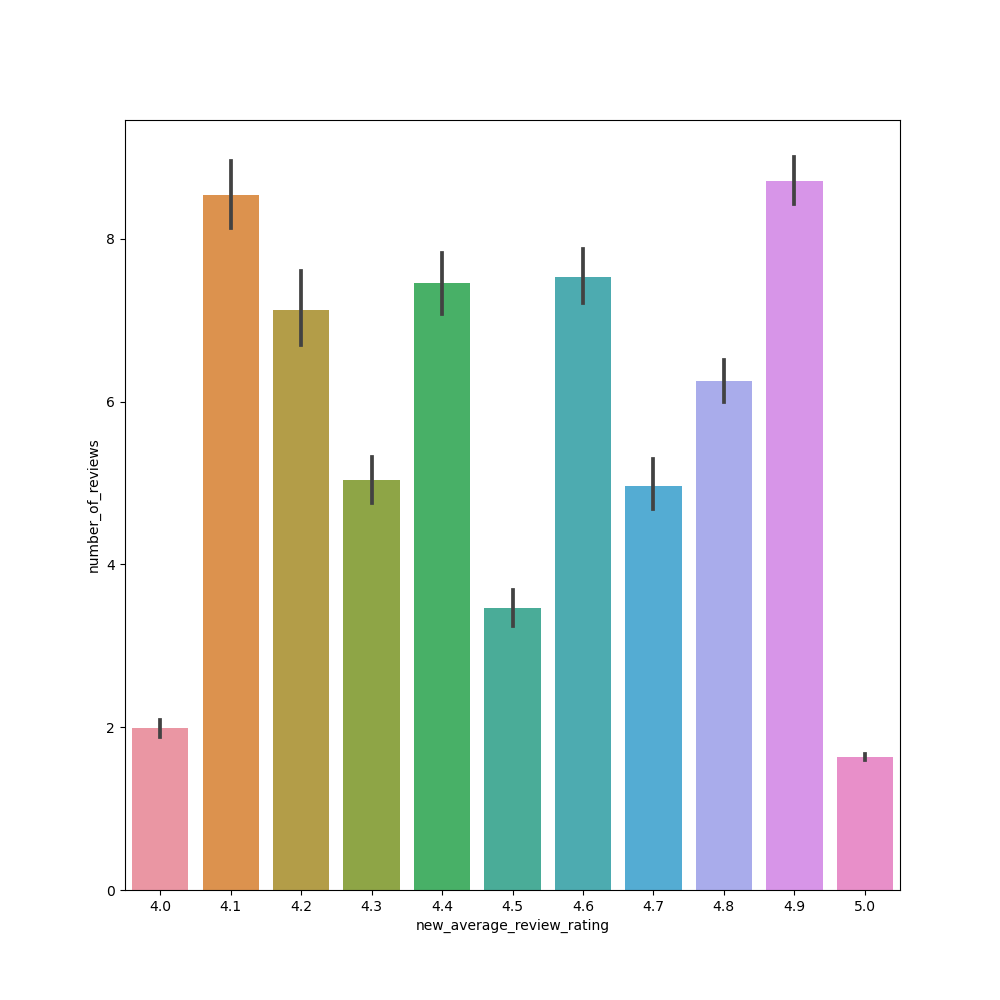

<AxesSubplot:xlabel='new_average_review_rating', ylabel='number_of_reviews'>

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(x=review_rating["new_average_review_rating"], y=reviews["number_of_reviews"])

<IPython.core.display.Javascript object>


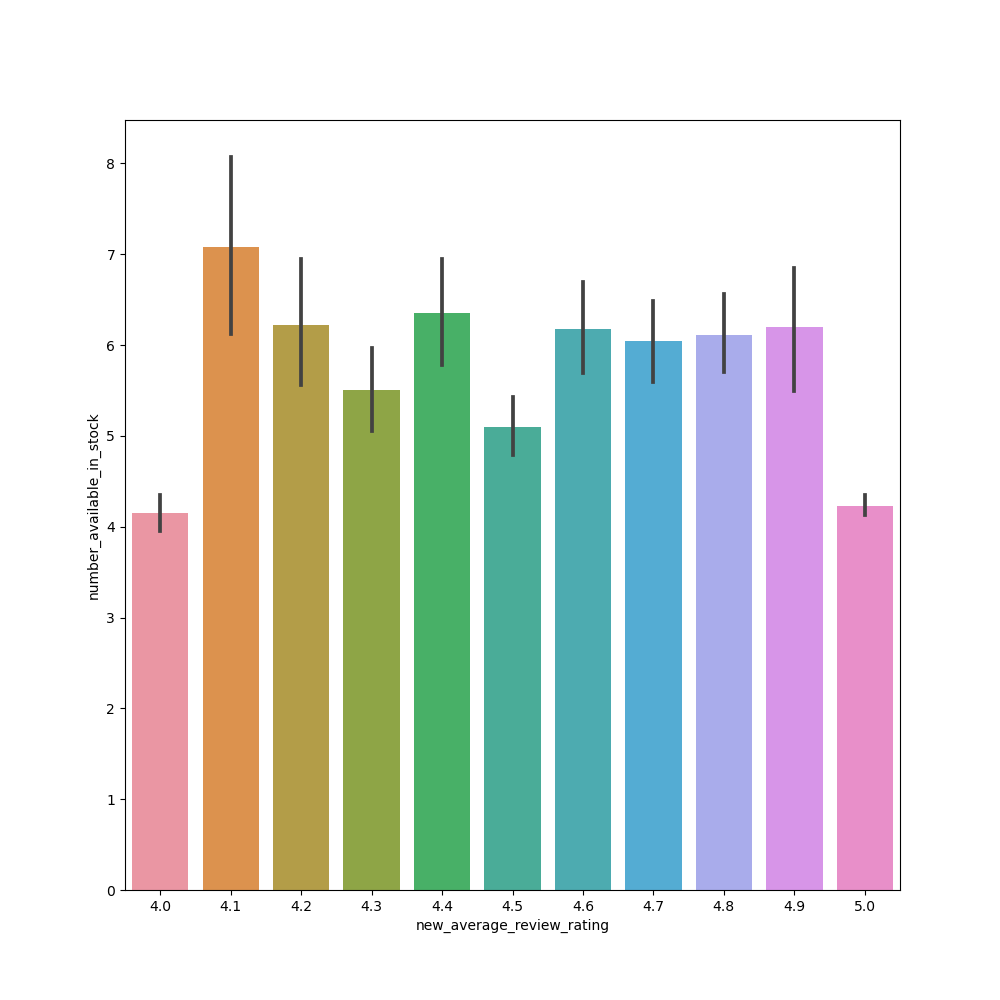

<AxesSubplot:xlabel='new_average_review_rating', ylabel='number_available_in_stock'>

In [36]:
plt.figure(figsize=(10, 10))
sns.barplot(x=review_rating["new_average_review_rating"],  y=stock["number_available_in_stock"])

<IPython.core.display.Javascript object>


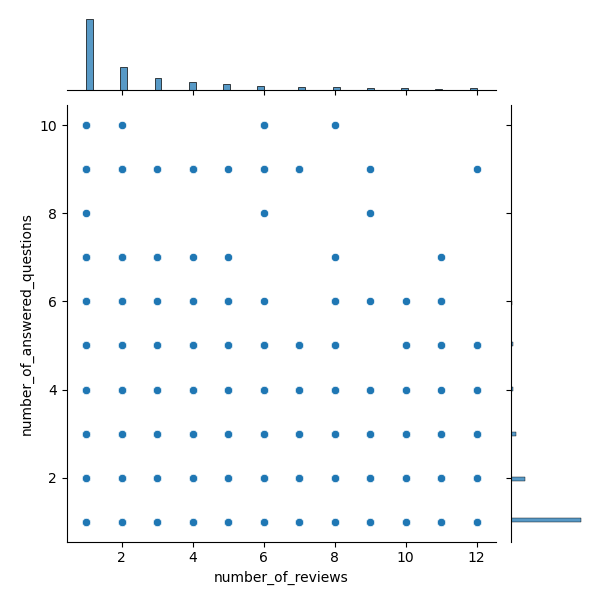

In [37]:
# Quanto menor o numero de reviews, maiores são as repostas das perguntas destes reviews até o 9 number_of_reviews
# The lower the number_of_reviews, the greater the answers to questions from these reviews up to 9 number_of_reviews
sns.jointplot(x=reviews['number_of_reviews'], y=answered_questions['number_of_answered_questions'])

### Contagem de valores por produtos e fabricantes
### Value count by product and manufacturer

In [38]:
df['manufacturer'].value_counts()[:20]

LEGO                             180
Disney                           167
Oxford Diecast                   156
Playmobil                        147
Star Wars                        120
Mattel                           114
Hasbro                           110
The Puppet Company               109
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
Pokémon                           69
Schleich                          68
Amscan                            65
Every-occasion-party-supplies     62
FunKo                             59
Melissa & Doug                    59
Papo                              58
Tamiya                            57
Name: manufacturer, dtype: int64

In [39]:
df['main_category'].value_counts()

Hobbies                             2156
Die-Cast & Toy Vehicles             1221
Figures & Playsets                  1111
Characters & Brands                  960
Games                                941
Arts & Crafts                        802
Party Supplies                       694
Fancy Dress                          585
Sports Toys & Outdoor                372
Dolls & Accessories                  371
Jigsaws & Puzzles                    274
Puppets & Puppet Theatres            269
Baby & Toddler Toys                  106
Pretend Play                          45
Musical Toy Instruments               19
Novelty & Special Use                 11
Pens, Pencils & Writing Supplies       7
Office Supplies                        6
Electronic Toys                        5
Home Accessories                       5
Cooking & Dining                       4
Bags                                   4
Women                                  3
Worlds Apart                           3
Educational Toys

In [40]:
price_by_manufacturer = review_rating[["manufacturer", "number_available_in_stock", "new_average_review_rating", "number_of_answered_questions", "number_of_reviews",
                                   "new_price"]].groupby( "manufacturer").sum().sort_values(by=["new_average_review_rating"], ascending=False)[:10]
display(price_by_manufacturer)

,number_available_in_stock,new_average_review_rating,number_of_answered_questions,number_of_reviews,new_price
manufacturer,,,,,
LEGO,3083.0,855.3,429.0,3156.0,5194.91
Disney,1313.0,783.1,314.0,1449.0,2432.81
Oxford Diecast,725.0,747.7,236.0,323.0,1696.49
Playmobil,2412.0,689.8,359.0,3225.0,3740.52
Star Wars,1421.0,569.5,164.0,1595.0,2477.73
Mattel,650.0,532.2,212.0,1138.0,2080.91
The Puppet Company,351.0,517.4,144.0,1187.0,1609.21
Hasbro,510.0,499.3,166.0,943.0,2965.13
MyTinyWorld,186.0,457.9,93.0,139.0,286.81


In [41]:
# Vemos que os mais bem avaliados são brinquedos para crianças e items para hobbies
# The best rated are toys for children and items for hobbies

In [42]:
# Entrando nos detalhes para obter as respostas mais precisas sobre as avaliações preços individuais dos 20 melhores
# Going into the details fro the most accurate answer on the top 20 individual pricing reviews

In [43]:
price_by_product = review_rating[["manufacturer", "product_name", "number_available_in_stock", "main_category", "new_average_review_rating", "number_of_answered_questions", "number_of_reviews",
                                   "new_price"]].groupby(["manufacturer", "product_name"]).sum().sort_values(by=["new_average_review_rating"], ascending=False)[:20]
display(price_by_product)

,,number_available_in_stock,new_average_review_rating,number_of_answered_questions,number_of_reviews,new_price
manufacturer,product_name,,,,,
Chessex,Polyhedral Dice,10.0,15.0,3.0,7.0,32.68
Nollmit,Zoo Animal Hand Sock Glove Finger Puppets Sack Plush Toy Cow,10.0,12.6,3.0,1545.0,8.82
Set,"Set, Model Car, Ready-made, Wiking / PMS 1:87",4.0,10.0,4.0,2.0,77.90
LEGO,Polyhedral Dice,4.0,10.0,2.0,2.0,19.98
Identipen,IdentiPen Dual Point Marker,4.0,10.0,5.0,2.0,3.98
Takara Tomy,Optimus Prime DMK 01 Transformers Movie Dual Model Kit,20.0,10.0,2.0,4.0,197.56
The Dice Place,"100 six sided dice, 14mm, random colours",4.0,10.0,2.0,3.0,21.58
NPK,22 Silicone Reborn Baby Girl Realistic Newborn Baby Doll for Toddlers Xmas Gift,4.0,10.0,2.0,2.0,19.98
SGM ®,Super Truck model sound + light 1:24 scale included 4 small F1 cars,4.0,9.8,2.0,7.0,27.98


### Nova coluna para a visualição do preço em media dos produtos melhor avaliado
### New column to displaying the average price of the best rated products

In [44]:
# Fazendo um processamento para a aplicar na nova coluna
# Precisamos coloca 0.01 centavo de euro para que nao seja indicado produtos que tenha valores igual a 0
def categoriza(s):
    if s >= 100.00:
            return 'Expensive'
    elif s >= 50.00:
            return 'Medium Price'
    elif s >= 00.01:
            return 'Cheap'

In [45]:
# Criando uma nova coluna a partir do processamento realizado.
# Creaing a new column from the process caried out
df['new_price'] = df["new_price"].apply(categoriza)

In [46]:
# Vizualizando a nova coluna 
# Viewing the new 
df['new_price'].value_counts()

Cheap           9418
Medium Price     364
Expensive        220
Name: new_price, dtype: int64

### Analisando a coluna do preço
### Analizyng the price column

In [47]:
# Para saber a media dos preços de cada avaliação, separei em 3 conjuntos: barato, médio e caro, e consigo dizer, quanto eles preferem pagar, pelos melhores produtos
# To know the average price of each evaluation, I separated it into 3 sets: cheap, medium and expensive, and I can tell, how much they prefer to pay, for the best products
pd.crosstab(df['new_price'],review_rating['new_average_review_rating'])

new_average_review_rating,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
new_price,,,,,,,,,,,
Cheap,1243,143,207,396,288,694,380,504,547,229,4768
Expensive,31,2,6,2,2,8,4,8,3,2,151
Medium Price,38,0,4,9,8,16,8,16,17,6,241


In [48]:
pd.crosstab(df['new_price'],stock['number_available_in_stock'])

number_available_in_stock,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
new_price,,,,,,,,,,,,,,,,,,,,
Cheap,501,3605,928,726,563,455,357,284,191,193,167,152,115,109,114,100,74,75,69,49
Expensive,1,109,34,18,10,8,5,2,5,5,4,2,1,1,2,2,2,1,0,1
Medium Price,4,147,37,19,19,16,12,12,12,8,9,7,5,6,4,4,5,4,4,1


In [49]:
pd.crosstab(stock['number_available_in_stock'],review_rating['new_average_review_rating'])

new_average_review_rating,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
number_available_in_stock,,,,,,,,,,,
1.0,82,3,8,18,15,44,16,22,30,7,260
2.0,579,35,54,124,79,253,85,140,134,58,2313
3.0,153,15,28,42,24,60,31,44,43,20,538
4.0,94,12,18,32,24,47,28,39,57,11,400
5.0,79,11,13,25,15,49,29,39,31,14,286
6.0,64,5,14,20,12,38,26,31,27,13,228
7.0,51,5,8,28,13,27,22,14,34,9,163
8.0,34,6,8,12,15,26,25,13,12,15,131
9.0,29,1,6,8,9,20,13,16,12,2,92


In [50]:
pd.crosstab(answered_questions['number_of_answered_questions'],review_rating['new_average_review_rating'])

new_average_review_rating,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
number_of_answered_questions,,,,,,,,,,,
1.0,947,89,149,273,204,498,277,370,406,175,3800
2.0,194,27,27,65,48,104,53,77,95,35,741
3.0,80,9,16,29,21,48,29,26,23,8,274
4.0,23,7,11,9,7,21,9,18,9,7,114
5.0,24,4,5,9,6,15,6,10,11,4,66
6.0,13,1,1,2,0,4,5,9,6,2,39
7.0,3,1,2,7,1,3,3,4,2,3,17
8.0,0,2,1,1,1,0,0,1,0,0,1
9.0,3,0,1,4,2,3,3,3,3,0,32


## Alguns Insights / Some Insights
- há uma grande quantidade de produtos das categorias hobbies, Die-Cast & Toy Vehicles e Figures & Playsets a venda, que são produtos para diversão/passatempo, ou para crianças
- Os produtos mais populares são das categorias acima( carros e bonecos colecionaveis, brinquedos de crianças: bonecas(os), carros, dados para jogos de tabuleiros como hobbies). 
- Produtos mais populares estão na faixa de até 50 Euros.
- Poucos estoque e menos reviews mais atrativo o produto se torna, resultando na melhora de avaliações dos usuarios sobre o produto.
- Produtos com menos reviews tem mais resposta de perguntas
- Onde se tem a maioria dos produtos que são no 4.0 e 5.0 do review_raitng se tem menos numeros em estoque e mais numeros de  respostas, os tornando produtos mais procurados, se encaixando nos requisitos acima

---------------------------------------------------------------------------------------------------------------------------

- There are a large number of products from the hobbies, Die-Cast & Toy Vehicles e Figures & Playsets categories to sale, which are usually products for fun
- The most popular products are from above categories(collectible car and collectible dolls, children´s toy:dolls, and toy car. Dice for board games as hobbies  
- The most popular products are in the range of up to 50 Euros.
- Fewer stocks and less reviews the more attractive the product becomes, resulting in improved user ratings about the product.
- Items with fewer reviews have more answer to question
- The most part of the products that are in the 4.0 and 5.0 of the review_raitng, there are fewer numbers in stock and more numbers of answers, making them more sought after products, fitting the above requirements